In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import scipy as sp
import scipy.stats as spst
import scipy.special as spsp
import scipy.integrate as spint
np.set_printoptions(precision=2)

# Trapezoidal / Simpson's rule

In [120]:
f = lambda x: np.exp(-3*x)
exact = (1 - np.exp(-3))/3
print(exact)

0.3167376438773787


In [121]:
f = lambda x: 3*x**2
exact = 1.
print(exact)

1.0


In [122]:
f = lambda x: 1/(1+x*x)
exact = np.arctan(1)
print(exact)

0.7853981633974483


In [129]:
x_grid = np.arange(0, 1.001, 0.01)
y_grid = f(x_grid)
x_eq = np.arange(0, 1.001, 0.2)

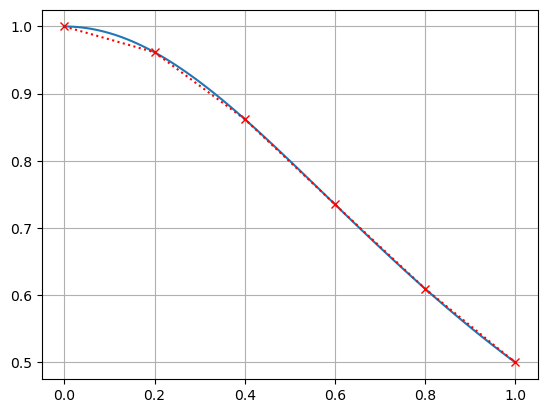

In [130]:
plt.plot(x_grid, y_grid)
plt.plot(x_eq, y_eq, 'rx:')
plt.grid()

In [131]:
e1 = spint.trapezoid(y, x) - exact
e2 = spint.simpson(y, x) - exact
print(f'trapezoid: {e1}')
print(f'simpson  : {e2}')

trapezoid: -0.0016666349447008733
simpson  : 6.270400573338275e-05


# Legendre Quadrature

In [135]:
x_qd, w = spsp.roots_legendre(5)
x_qd, w = (1+x_qd)/2, w/2
x_qd, w

(array([0.05, 0.23, 0.5 , 0.77, 0.95]), array([0.12, 0.24, 0.28, 0.24, 0.12]))

In [134]:
f_qd = sp.interpolate.lagrange(x_qd, f(x_qd))
f_eq = sp.interpolate.lagrange(x_eq, f(x_eq))                               

In [137]:
e1 = sum(w*f(x_qd)) - exact
print(f'Legendre: {e1}')

Legendre: -3.426260053451813e-09


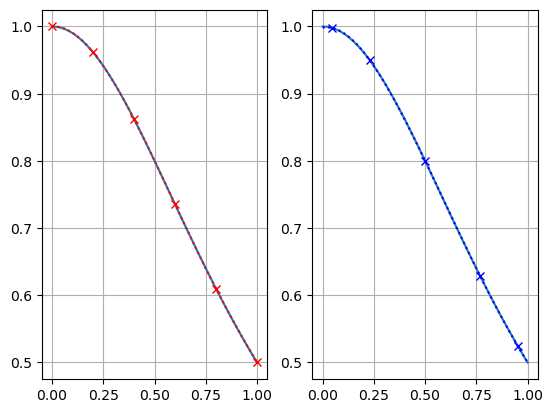

In [139]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x_grid,y_grid)
ax1.plot(x_eq, f(x_eq), 'rx')
ax1.plot(x_grid,f_eq(x_grid), 'r:')
ax1.grid()

ax2.plot(x_grid,y_grid)
ax2.plot(x_qd, f(x_qd), 'bx')
ax2.plot(x_grid,f_qd(x_grid), 'b:')
ax2.grid()

# Gauss-Hermite Quadrature

In [142]:
z, w = spsp.roots_hermitenorm(6)
w /= np.sqrt(2*np.pi)
z, w, sum(w)

(array([-3.32, -1.89, -0.62,  0.62,  1.89,  3.32]),
 array([0.  , 0.09, 0.41, 0.41, 0.09, 0.  ]),
 1.0)

In [143]:
mom = np.cumprod([1, 3, 5, 7, 9, 11, 13, 15, 17])
mom

array([       1,        3,       15,      105,      945,    10395,
         135135,  2027025, 34459425])

In [144]:
for n in (1, 2, 3, 4, 5, 6, 7):
    print(f'Error of {2*n}-th moment: {sum(z**(2*n) * w)/mom[n-1]-1.}')

Error of 2-th moment: 6.661338147750939e-16
Error of 4-th moment: 1.3322676295501878e-15
Error of 6-th moment: 1.5543122344752192e-15
Error of 8-th moment: 1.5543122344752192e-15
Error of 10-th moment: 1.5543122344752192e-15
Error of 12-th moment: -0.06926406926406792
Error of 14-th moment: -0.2291042291042279


In [145]:
z, w = spsp.roots_hermitenorm(10)
w /= np.sqrt(2*np.pi)

y = np.exp(z - 1/2)
e1 = np.sum(y*w) - 1.

In [92]:
print(f'G-H quadrature: {e1}')

G-H quadrature: -1.1503020758141247e-12


In [146]:
z, w = spsp.roots_hermitenorm(9)
w /= np.sqrt(2*np.pi)

y = 1/(1+z**2)
exact = np.sqrt(np.e*np.pi*2) * spst.norm.cdf(-1)
e1 = np.sum(y*w) - exact
print(f'G-H quadrature: {e1}')

G-H quadrature: 0.008442594985781926


In [163]:
z_grid = np.arange(-4.5, 4.51, step=0.1)
z, w = spsp.roots_hermitenorm(9)
f = sp.interpolate.lagrange(z, 1/(1+z**2))

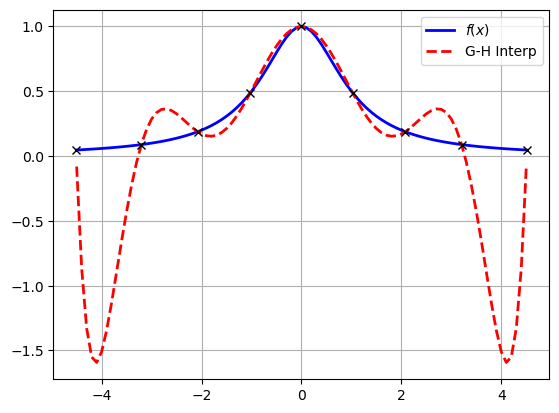

In [164]:
plt.plot(z_grid, 1/(1+z_grid**2), 'b', linewidth=2)
plt.plot(z_grid, f(z_grid), 'r--', linewidth=2)
plt.plot(z, 1/(1+z**2), 'kx')
plt.legend(['$f(x)$', 'G-H Interp'])
plt.grid()